In [ ]:
import numpy as np
import random
from rdkit import Chem
import matplotlib.pyplot as plt
from utils import load_dataset_df, fp_generator

#### Load DataFrame

In [2]:
files = ['tox21.csv','sider.csv', 'BBBP.csv']
dt_file = files[2]

df, targets = load_dataset_df(filename=dt_file)
print(targets)

target_name = targets[0]
df = df[[target_name, 'smiles']].dropna()


['p_np']


#### Molecule to Fingerprint Vizualization

CO/N=C(C(=O)N[C@H]1[C@H]2SCC(=C(N2C1=O)C(O)=O)CSC(=O)c3occc3)/c4csc(N)n4
95
0 ((33, 3),)
5 ((14, 1),)
33 ((0, 0),)
39 ((9, 2),)
42 ((27, 2),)


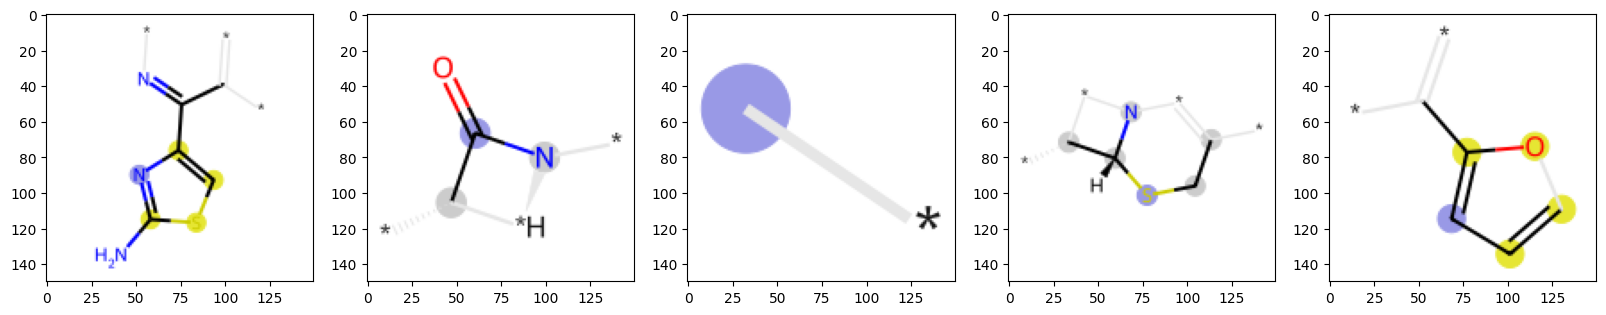

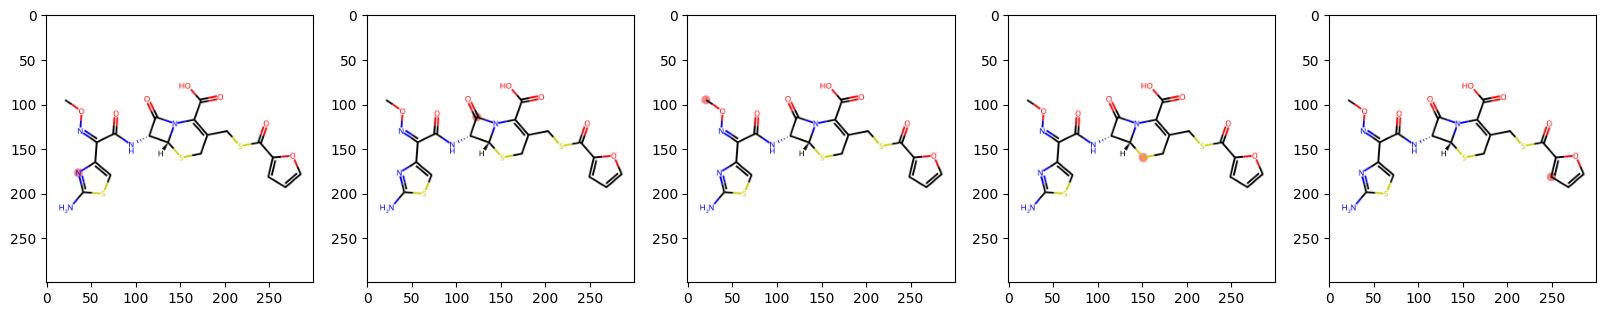

In [3]:
from rdkit.Chem import Draw, AllChem
from IPython.display import display


row = df.iloc[random.randint(0, len(df))]

mol = Chem.MolFromSmiles(row['smiles'])

if mol is not None:
    img = Draw.MolToImage(mol)
print(row['smiles'])

#TODO: (at a later point)
""" mol2 = Chem.RWMol(mol)
mol2 = mol2.RemoveAtom(1)

mol2 = Chem.MolToSmiles(mol2)
mol2 = Chem.SanitizeMol(mol2)


mol2 = Chem.Mol(mol2)
img2 = Draw.MolToImage(mol2)
display(img2) """

fpgen = fp_generator('morgan', radius=3)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()

fp = fpgen(mol,additionalOutput=ao) ## tentar converter para (#, #) e depois para bits
bi = ao.GetBitInfoMap()

fp = np.array(fp)
print(fp.sum())
fig, axs = plt.subplots(1, 5, figsize=(20, 20))
fig2, axs2 = plt.subplots(1, 5, figsize=(20, 20))

for i, id in enumerate(list(bi.keys())[:5]):
    print(id, bi[id])
    mfp2_svg = Draw.DrawMorganBit(mol, bitId=id, bitInfo=bi)

    atoms = [info[0] for info in bi[id]]
    colors = {idx: (1, 1, 0) for idx in atoms}

    img2 = Draw.MolToImage(mol, highlightAtoms=atoms, highlightAtomColors=colors)
    
    axs[i].imshow(mfp2_svg)
    axs2[i].imshow(img2)


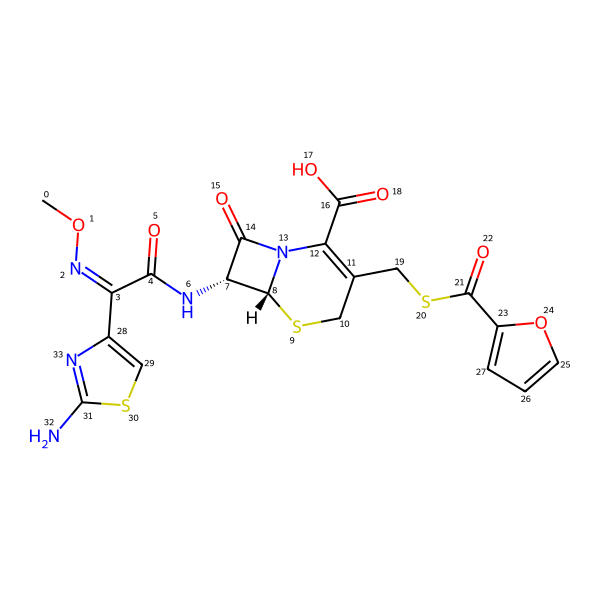

In [4]:
for i, atom in enumerate(mol.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom.SetProp("atomNote", f"{i}")
    
Draw.MolToImage(mol, size=(600, 600))